In [35]:
#Import cluster algorithms
from sklearn.cluster import KMeans, DBSCAN

#Import classifiers
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

#Import libraries to deal with data
import numpy as np
import pandas as pd
import pickle


#Process data libraries
from skimage import io
from scipy import signal
import pylab, wave
from scipy.io import wavfile

#Miscelanous
import math
import time
import os
import warnings


#Graphs and show images
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches



np.random.seed(10)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
%matplotlib inline 


Functions

In [36]:
def wavInfo(rec_file):
    sample_rate, samples = wavfile.read(rec_file)
    channels  = wave.open(rec_file, 'r').getnchannels()
    return sample_rate, samples, channels


#Function to calculate spectrogram
def calculate_spectrogram(samples, sample_rate, channels):
    # Verify if the audio has one or two channels
    if channels == 2:
        # Use only the second channel
        samples = samples[:, 1]

    # Calculate the spectrogram using scipy.signal.spectrogram
    nfft = 512
    window = "hann"
    freqs, times, spectrum = signal.spectrogram(
        samples, fs=sample_rate, nfft=nfft, window=signal.get_window(window, nfft)
    )

    return freqs, times, spectrum

    



In [37]:
##############################################
#                                            #
#              Image/Plotting                #
#                                            #
##############################################
# Function to visualize the spectrogram
def plot_spectrogram(
    times, freqs, spectrum, 
    cmap="viridis", 
    patches=None, 
    log_scale=True, 
    facecolor="white", 
    figsize=(10, 6), 
    xlab="Time (s)", 
    ylab="Frequency (Hz)", 
    title="Spectrogram", 
    colorbar=True
):
    """
    Function to plot spectrograms with advanced features like custom colormap, 
    logarithmic scale, custom background, and patches.

    Parameters:
        times (array): Time steps (shape: (N,)).
        freqs (array): Frequency steps (shape: (M,)).
        spectrum (2D array): Magnitude values (shape: (M, N)).
        cmap (str): Colormap for the spectrogram. Default is "viridis".
        patches (list): List of matplotlib.patches.Patch objects to overlay.
        log_scale (bool): Apply logarithmic scale to spectrum. Default is True.
        facecolor (str): Background color for the plot. Default is "white".
        figsize (tuple): Figure size (width, height). Default is (10, 6).
        xlab (str): Label for the x-axis. Default is "Time (s)".
        ylab (str): Label for the y-axis. Default is "Frequency (Hz)".
        title (str): Title of the plot. Default is "Spectrogram".
        colorbar (bool): Whether to include a colorbar. Default is True.
    """
    # Apply logarithmic scale to spectrum if requested
    if log_scale:
        spectrum = 10 * np.log10(spectrum)
        spectrum = np.where(spectrum == -np.inf, 0, spectrum)  # Replace -inf with 0 for log scale

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_facecolor(facecolor)

    # Plot the spectrogram
    im = ax.pcolormesh(times, freqs, spectrum, cmap=cmap, shading="auto")

    # Add patches if provided
    if patches is not None:
        for patch in patches:
            ax.add_patch(patch)

    # Add axis labels and title
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)

    # Add colorbar if requested
    if colorbar:
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label("Intensity (dB)" if log_scale else "Intensity")

    plt.tight_layout()
    plt.show()

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

TypeError: Dimensions of C (257, 6370) should be one smaller than X(257) and Y(6370) while using shading='flat' see help(pcolormesh)

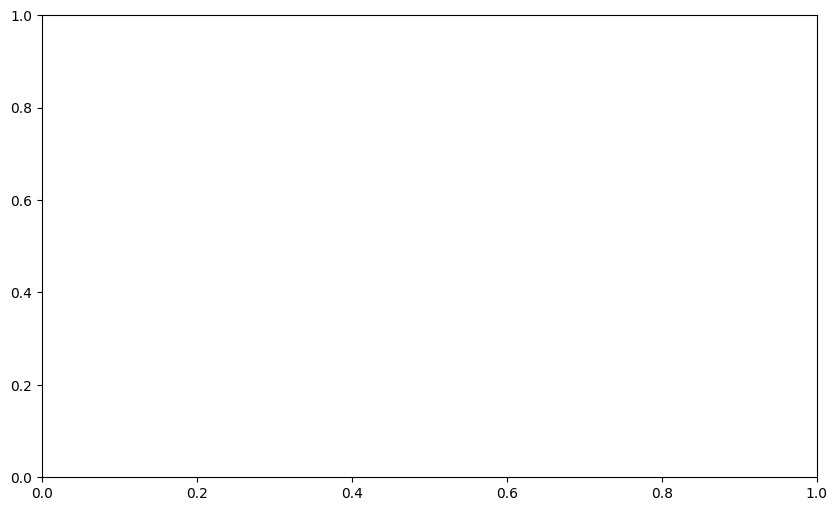

In [39]:
#audio file path
path = "03-10-3022_30_38.wav"

 
# Get WAV info
sample_rate, samples, channels = wavInfo(path)

# Calculate spectrogram
freqs, times, spectrum = calculate_spectrogram(samples, sample_rate, channels)

# Plot spectrogram
plot_spectrogram(freqs, times, spectrum, title="Spectrogram of Audio File")
